1. With C= 1

In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
df=pd.read_csv('linear_overlapping.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_train = train_df['x1'].values
x2_train = train_df['x2'].values
y_train = train_df['y'].values


X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='linear' uses the exact same math you are trying to write
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

print("Coefficients (w):", model.coef_)
print("Intercept (b):", model.intercept_)

Coefficients (w): [[0.59354241 0.65263245]]
Intercept (b): [0.00730668]


[0.25115537 1.27732408]


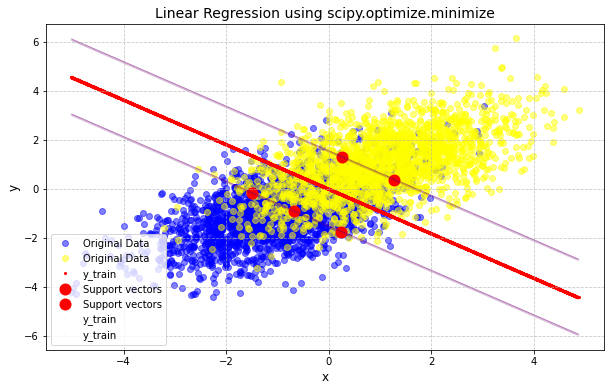

In [2]:
x1=np.linspace(min(x1_train),max(x1_train),4000)
Y=(model.coef_[0][0]*x1+model.intercept_[0])/(-model.coef_[0][1])
Y1=(model.coef_[0][0]*x1_train+model.intercept_[0]+1)/(-model.coef_[0][1])
Y3=(model.coef_[0][0]*x1+model.intercept_[0]+1)/(-model.coef_[0][1])
Y2=(model.coef_[0][0]*x1_train+model.intercept_[0]-1)/(-model.coef_[0][1])
Y4=(model.coef_[0][0]*x1+model.intercept_[0]-1)/(-model.coef_[0][1])
# Use the & operator and wrap conditions in parentheses
mask2 = (x2_train > Y2 - 0.001) & (x2_train < Y2 + 0.001)
mask1 = (x2_train > Y1 - 0.001) & (x2_train < Y1 + 0.001)
x1_SV1 = x1_train[mask2]
x1_SV2=x1_train[mask1]
x2_SV1=x2_train[mask2]
x2_SV2=x2_train[mask1]
print(x1_SV1)
plt.figure(figsize=(10,6))
plt.scatter(x1_train[y_train==-1], x2_train[y_train==-1] ,color="blue",alpha=0.5,label='Original Data')
plt.scatter(x1_train[y_train==1], x2_train[y_train==1] ,color="yellow",alpha=0.5,label='Original Data')
plt.scatter(x1, Y, color='red', linewidth=2, label="y_train",s=1.2) 
plt.scatter(x1_SV1, x2_SV1, color='red', linewidth=2, label="Support vectors",s=100) 
plt.scatter(x1_SV2, x2_SV2, color='red', linewidth=2, label="Support vectors",s=100) 
plt.scatter(x1, Y3, color='purple', linewidth=2, label="y_train",linestyle='dotted', s=0.01,alpha=0.2) 
plt.scatter(x1, Y4, color='purple', linewidth=2, label="y_train",linestyle=':',s=0.01,alpha=0.2) 
plt.title('Linear Regression using scipy.optimize.minimize', fontsize=14) 
plt.xlabel('x', fontsize=12) 
plt.ylabel('y', fontsize=12) 
plt.legend() 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

3. With C=[0.1,10,100]

Coefficients (w): [[0.56666437 0.61409351]]
Intercept (b): [0.01028381]
[0.04691797 0.38705479]


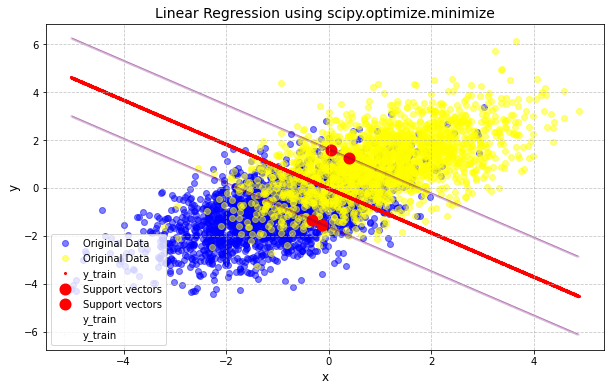

Coefficients (w): [[0.59354241 0.65263245]]
Intercept (b): [0.00730668]
[0.25115537 1.27732408]


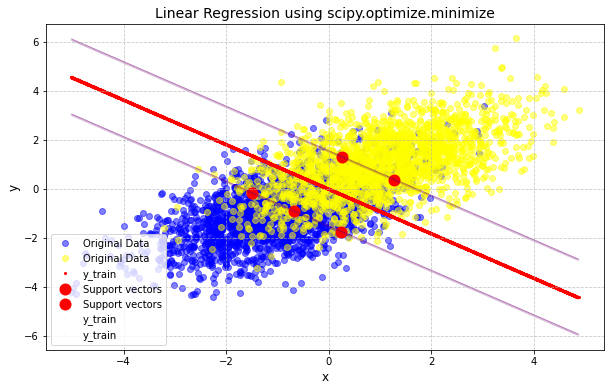

Coefficients (w): [[0.59404098 0.65320579]]
Intercept (b): [0.00817074]
[0.39218539]


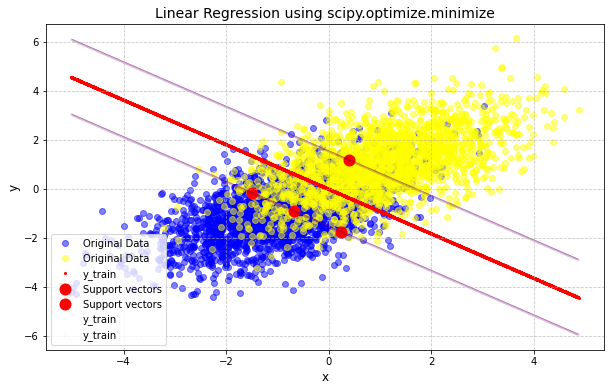

In [ ]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
df=pd.read_csv('linear_overlapping.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_train = train_df['x1'].values
x2_train = train_df['x2'].values
y_train = train_df['y'].values


X_train = np.column_stack((train_df['x1'].values, train_df['x2'].values))
y_train = train_df['y'].values.astype(float)
N = len(y_train)
# kernel='linear' uses the exact same math you are trying to write
for i in [0.01,1,100]:
    model = SVC(kernel='linear', C=i)
    model.fit(X_train, y_train)

    print("Coefficients (w):", model.coef_)
    print("Intercept (b):", model.intercept_)
    x1=np.linspace(min(x1_train),max(x1_train),4000)
    Y=(model.coef_[0][0]*x1+model.intercept_[0])/(-model.coef_[0][1])
    Y1=(model.coef_[0][0]*x1_train+model.intercept_[0]+1)/(-model.coef_[0][1])
    Y3=(model.coef_[0][0]*x1+model.intercept_[0]+1)/(-model.coef_[0][1])
    Y2=(model.coef_[0][0]*x1_train+model.intercept_[0]-1)/(-model.coef_[0][1])
    Y4=(model.coef_[0][0]*x1+model.intercept_[0]-1)/(-model.coef_[0][1])
    # Use the & operator and wrap conditions in parentheses
    mask2 = (x2_train > Y2 - 0.001) & (x2_train < Y2 + 0.001)
    mask1 = (x2_train > Y1 - 0.001) & (x2_train < Y1 + 0.001)
    x1_SV1 = x1_train[mask2]
    x1_SV2=x1_train[mask1]
    x2_SV1=x2_train[mask2]
    x2_SV2=x2_train[mask1]
    print(x1_SV1)
    plt.figure(figsize=(10,6))
    plt.scatter(x1_train[y_train==-1], x2_train[y_train==-1] ,color="blue",alpha=0.5,label='Original Data')
    plt.scatter(x1_train[y_train==1], x2_train[y_train==1] ,color="yellow",alpha=0.5,label='Original Data')
    plt.scatter(x1, Y, color='red', linewidth=2, label="y_train",s=1.2) 
    plt.scatter(x1_SV1, x2_SV1, color='red', linewidth=2, label="Support vectors",s=100) 
    plt.scatter(x1_SV2, x2_SV2, color='red', linewidth=2, label="Support vectors",s=100) 
    plt.scatter(x1, Y3, color='purple', linewidth=2, label="y_train",linestyle='dotted', s=0.01,alpha=0.2) 
    plt.scatter(x1, Y4, color='purple', linewidth=2, label="y_train",linestyle=':',s=0.01,alpha=0.2) 
    plt.title('Linear Regression using scipy.optimize.minimize', fontsize=14) 
    plt.xlabel('x', fontsize=12) 
    plt.ylabel('y', fontsize=12) 
    plt.legend() 
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

1. Hypertuning C to get higher validation accuracy

Coefficients (w): [[0.3124826  0.32114605]]
Intercept (b): [0.00406226]
Coefficients (w): [[0.50924333 0.53429574]]
Intercept (b): [-0.00552094]
Coefficients (w): [[0.57134613 0.61949856]]
Intercept (b): [-0.03412648]
Coefficients (w): [[0.58579522 0.62756596]]
Intercept (b): [-0.04554022]
Coefficients (w): [[0.5856576  0.62742968]]
Intercept (b): [-0.04545627]
Coefficients (w): [[0.58532306 0.62745479]]
Intercept (b): [-0.04547315]
Coefficients (w): [[0.58623547 0.62742524]]
Intercept (b): [-0.04514411]


Text(0, 0.5, 'Validation Accuracy')

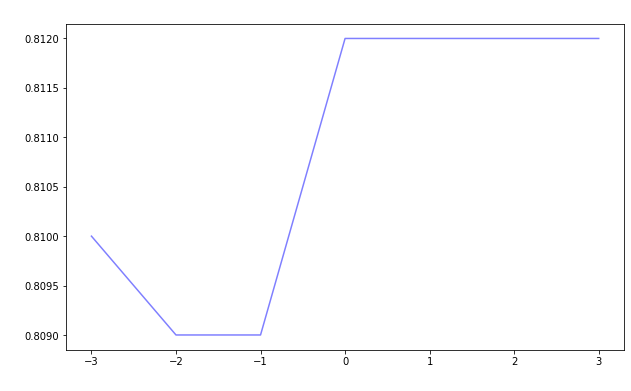

In [5]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
df=pd.read_csv('linear_overlapping.csv')
train_df, val_df = train_test_split(df, test_size=0.20, random_state=42)

# Extracting values for training set
x1_val = val_df['x1'].values
x2_val = val_df['x2'].values
y_val = val_df['y'].values


x1_val = np.column_stack((val_df['x1'].values, val_df['x2'].values))
y_val = val_df['y'].values.astype(float)
N = len(y_val)
valid_acc=[0.0,0.0,0.0,0.0,0.0,0.0,0.0]
C=[0.001,0.01,0.1,1,10,100,1000]
# kernel='linear' uses the exact same math you are trying to write
for i in range(0,7,1):
    model = SVC(kernel='linear', C=C[i])
    model.fit(x1_val, y_val)

    print("Coefficients (w):", model.coef_)
    print("Intercept (b):", model.intercept_)
    y_val_pred = model.predict(x1_val)
    valid_acc[i]=np.sum(y_val_pred == y_val) / len(y_val)

plt.figure(figsize=(10,6))
plt.plot(np.log10(C), valid_acc,color="blue",alpha=0.5,label='Original Data')
plt.title('Validation Accuracy v/s C', fontsize=14, color='white') 
plt.xlabel('Values of C', fontsize=12,color='white') 
plt.ylabel('Validation Accuracy', fontsize=12,color='white') 


1. Changing C does not have significant impact on Validation accuracy as visible in the plots.